<img src="resources/surfs-up.jpeg"/>

In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd

In [50]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [51]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [52]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [53]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [54]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [55]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# 1 - Calculate the date 1 year ago from the last data point in the database

# 2 - Perform a query to retrieve the data and precipitation scores

# 3 - Save the query results as a Pandas DataFrame and set the index to the date column

# 4 - Sort the dataframe by date

# 5 - Use Pandas Plotting with Matplotlib to plot the data


In [58]:
# 1 - Calculate the date 1 year ago from the last data point in the database
# 1a - Calculate last date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date 

('2017-08-23')

In [59]:
# 1b - Calculate one year before latest_date
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago


datetime.date(2016, 8, 23)

In [60]:
# 2 - Perform a query to retrieve the data and precipitation scores
last_year_of_data=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=one_year_ago).order_by(Measurement.date).all()
last_year_of_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [61]:
# 3 - Save the query results as a Pandas DataFrame and set the index to the date column
last_year_of_data_for_table = pd.DataFrame(last_year_of_data,columns=['date','rain'])
last_year_of_data_for_table.set_index('date')
last_year_of_data_for_table

,date,rain
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28


In [62]:
# 4 - Sort the dataframe by date
last_year_of_data_for_table.sort_values(by=['date'])

,date,rain
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
13,2016-08-24,1.45
12,2016-08-24,2.15
11,2016-08-24,1.22


<function matplotlib.pyplot.show(*args, **kw)>

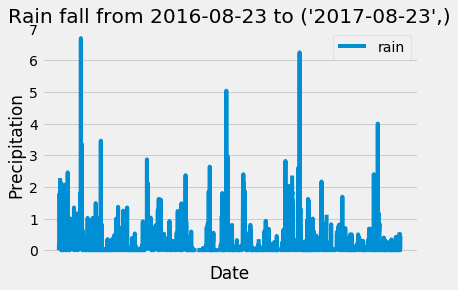

In [63]:
# 5 - Use Pandas Plotting with Matplotlib to plot the data (similar to precipitation chart provided)
last_year_of_data_for_table.plot(x_compat = True)
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title(f'Rain fall from {one_year_ago} to {latest_date}')
plt.xticks([])
plt.show

In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_of_data_for_table.describe()

,rain
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [65]:
# Design a query to show how many stations are available in this dataset?
num_of_stations = session.query(Station.id).count()
num_of_stations

9

In [66]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_by_count = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()
stations_by_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#get top station
stations_by_count_first = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()
top_station = stations_by_count_first[0]

# highest temperature recorded, and average temperature most active station
top_station_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station == top_station).all()
print(top_station)
print(top_station_stats)


USC00519281
[(54.0, 85.0, 71.66378066378067)]


In [68]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Get latest date for top station
latest_date_top = session.query(Measurement.date).filter(Measurement.station == top_station).order_by(Measurement.date.desc()).first()
latest_date_top 


('2017-08-18')

<function matplotlib.pyplot.show(*args, **kw)>

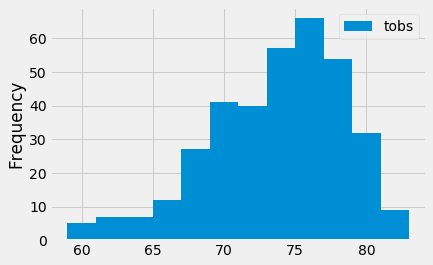

In [77]:
# Get one year ago for top station
one_year_ago_top = dt.date(2017,8,18) - dt.timedelta(days=365)

# Get last year of data for top
last_year_of_data_top = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>=one_year_ago_top).filter(Measurement.station == top_station).order_by(Measurement.date).all()

# Create dataframe
last_year_of_data_top_for_table = pd.DataFrame(last_year_of_data_top,columns=['date','tobs'])
last_year_of_data_top_for_table.set_index('date')
last_year_of_data_top_for_table

# Create table
last_year_of_data_top_for_table.plot.hist(bins = 12)
plt.show